In [1]:
import sys; sys.path.insert(0, '../')
import geoplot as gplt
import geoplot.crs as ccrs
import geopandas as gpd
import pandas as pd
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import shapely

In [3]:
collisions = pd.read_csv("../data/nyc_collisions/NYPD_Motor_Vehicle_Collisions_2016.csv")
def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return shapely.geometry.Point(0, 0)
    else:
        return shapely.geometry.Point(long, lat)

collisions = gpd.GeoDataFrame(collisions.head(5000), geometry=collisions.head(5000).apply(pointify, axis='columns'))
collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

In [4]:
boroughs = gpd.read_file("../data/nyc_boroughs/boroughs.geojson")

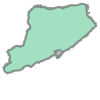

In [20]:
[p for p in boroughs.geometry.iloc[0]][3]

> /Users/Honors/Desktop/geoplot/geoplot/geoplot.py(1526)kdeplot()
-> kde = sns.kdeplot(pd.Series([p.x for p in df.geometry]), pd.Series([p.y for p in df.geometry]),
(Pdb) n
> /Users/Honors/Desktop/geoplot/geoplot/geoplot.py(1527)kdeplot()
-> transform=ccrs.PlateCarree(), **kwargs)
(Pdb) 
> /Users/Honors/Desktop/geoplot/geoplot/geoplot.py(1559)kdeplot()
-> return ax
(Pdb) 
--Return--
> /Users/Honors/Desktop/geoplot/geoplot/geoplot.py(1559)kdeplot()-><cartopy.mpl....t 0x10ad89d68>
-> return ax
(Pdb) 
--Call--
> /Users/Honors/anaconda/envs/geoplot/lib/python3.5/site-packages/IPython/core/displayhook.py(236)__call__()
-> def __call__(self, result=None):
(Pdb) q


BdbQuit: 

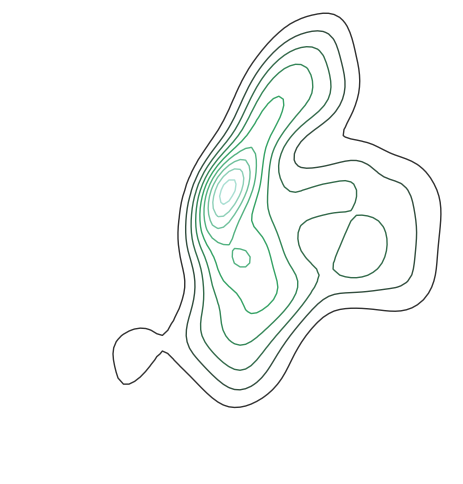

In [34]:
gplt.kdeplot(collisions, clip=boroughs.geometry, projection=ccrs.AlbersEqualArea())

In [ ]:
%debug

In [35]:
import seaborn as sns

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt

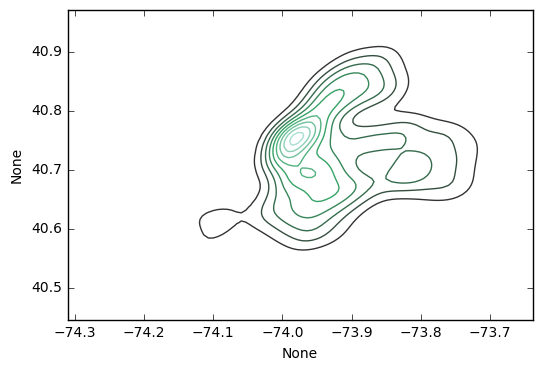

In [49]:
kde = sns.kdeplot(pd.Series([p.x for p in collisions.geometry]), pd.Series([p.y for p in collisions.geometry]))
staten_island = [p for p in boroughs.geometry.iloc[0]][3]
mock_coords = [c for c in staten_island.envelope.exterior.coords]
poly = mpl.patches.Polygon(mock_coords, closed=True, facecolor='red')
ax = plt.gca()
patch = mpl.patches.Circle((300,300), radius=100)
kde.set_clip_path(patch)

(-0.5, 9.5)
(9.5, -0.5)


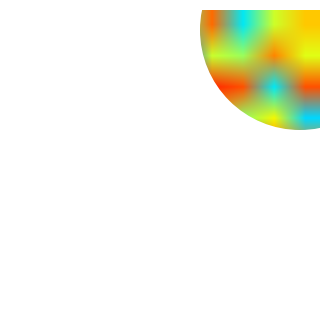

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

im = ax.imshow(np.random.rand(10,10))

print(ax.get_xlim())
print(ax.get_ylim())

patch = mpl.patches.Circle((300,300), radius=100)
im.set_clip_path(patch)

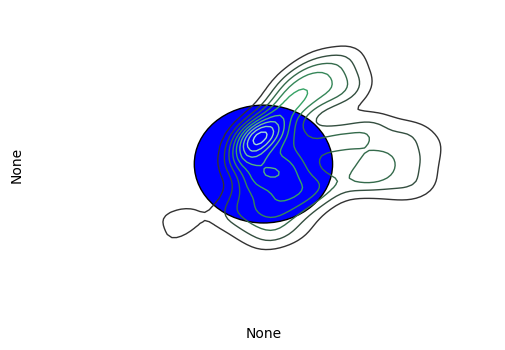

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

kde = sns.kdeplot(pd.Series([p.x for p in collisions.geometry]), pd.Series([p.y for p in collisions.geometry]),
                  ax=ax)

xmin, xmax = kde.get_xlim()
ymin, ymax = kde.get_ylim()

patch = mpl.patches.Circle(((xmin + xmax)/2, (ymin + ymax) / 2), radius=0.1)
ax.add_patch(patch)
kde.set_clip_path(patch)

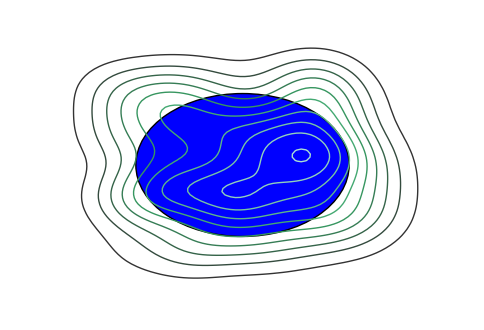

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

random_points = np.array([p for p in np.random.random(size=(100, 2)) if 0 < p[0] < 1 and 0 < p[1] < 1])

kde = sns.kdeplot(random_points[:,0], random_points[:,1], ax=ax)

xmin, xmax = kde.get_xlim()
ymin, ymax = kde.get_ylim()

patch = mpl.patches.Circle(((xmin + xmax)/2, (ymin + ymax) / 2), radius=0.4)
ax.add_patch(patch)
kde.set_clip_path(patch)